In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

ROOT_DIR = '/content'

DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'surface_crack')

TRAIN_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'train')

TEST_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'test')

In [6]:
import shutil
import os

try:
    dataset_path = '/content/drive/MyDrive/Git/ICT_Visual/Data'    
    shutil.copy(os.path.join(dataset_path, 'surface_crack.zip'), ROOT_DIR)

except Exception as err:
    print(str(err))

In [8]:
import zipfile

with zipfile.ZipFile('/content/surface_crack.zip','r') as target_file:

    target_file.extractall(DATA_ROOT_DIR)

In [10]:
import os
from glob import glob

label_list = os.listdir(DATA_ROOT_DIR)

print('total label nums = ', len(label_list))
print(label_list)
print('============================================')

for label_name in label_list:
    
    label_dir = os.path.join(DATA_ROOT_DIR,label_name)
    
    print('train label',label_name,'counts =>',len(os.listdir(label_dir)))
print('============================================')


total label nums =  2
['Negative', 'Positive']
train label Negative counts => 20000
train label Positive counts => 20000


# 원본 데이터를 train 디렉토리로 copy

In [11]:
import os
import shutil

if os.path.exists(TRAIN_DATA_ROOT_DIR):
    
    os.rmdir(TRAIN_DATA_ROOT_DIR)
    print(TRAIN_DATA_ROOT_DIR,'is deleted !')

shutil.copytree(DATA_ROOT_DIR,TRAIN_DATA_ROOT_DIR)


'/content/surface_crack/train'

# train 디렉토리의 하위 디렉토리와 동일하게 tets 디렉토리의 하위 디렉토리 생성

In [12]:
import os

label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

print('train label count =>',len(label_name_list))
if not os.path.exists(TEST_DATA_ROOT_DIR):
    os.mkdir(TEST_DATA_ROOT_DIR)
    print(TEST_DATA_ROOT_DIR,'is created !')
    
    count = 0

    for label_name in label_name_list:
        
        label_path = os.path.join(TEST_DATA_ROOT_DIR,label_name.strip())
        os.mkdir(label_path)
        print(label_path,'is created !')

train label count => 2
/content/surface_crack/test is created !
/content/surface_crack/test/Negative is created !
/content/surface_crack/test/Positive is created !


# 20%의 데이터를 test 디렉토리로 이동

In [13]:
import os
import shutil
import random
from glob import glob


ratio = 0.2

label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

for label_name in label_name_list:

    src_dir_path = os.path.join(TRAIN_DATA_ROOT_DIR,label_name)
    dst_dir_path = os.path.join(TEST_DATA_ROOT_DIR,label_name)
    
    train_data_file_list = os.listdir(src_dir_path)

    random.shuffle(train_data_file_list)
    print('train data shuffle is done !')

    print('=================================================')
    print('total [%s] data file nums => [%s]'%(label_name, len(train_data_file_list)))
    
    split_num = int(ratio*len(train_data_file_list))

    test_data_file_list = train_data_file_list[0:split_num]

    move_nums = 0
    for test_data_file in test_data_file_list:

        try:
            shutil.move(os.path.join(src_dir_path,test_data_file),
                        os.path.join(dst_dir_path,test_data_file))
        except Exception as err:
            print(str(err))
        move_nums +=1
    print('total move nums => ',move_nums)
    print('=================================================')

train data shuffle is done !
total [Negative] data file nums => [20000]
total move nums =>  4000
train data shuffle is done !
total [Positive] data file nums => [20000]
total move nums =>  4000


# 데이터 검증

In [14]:
# train 파일 개수 확인
label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

print(label_name_list)

for label_name in label_name_list:
    
    label_dir = os.path.join(TRAIN_DATA_ROOT_DIR,label_name)
    print('train label : [%s] => len [%s]'%(label_name, len(os.listdir(label_dir))))
    print('=========================================')

# test 파일 개수 확인
label_name_list = os.listdir(TEST_DATA_ROOT_DIR)

print(label_name_list)

for label_name in label_name_list:
    
    label_dir = os.path.join(TEST_DATA_ROOT_DIR,label_name)
    print('test label : [%s] => len [%s]'%(label_name, len(os.listdir(label_dir))))
    print('=========================================')


['Negative', 'Positive']
train label : [Negative] => len [16000]
train label : [Positive] => len [16000]
['Negative', 'Positive']
test label : [Negative] => len [4000]
test label : [Positive] => len [4000]


# 이미지 shape 설정

In [15]:
IMG_WIDTH = 64
IMG_HEIGHT = 64

# Class dict 정의

In [16]:
class_dict = {'Negative':0, 'Positive':1}

# train image load

In [17]:
train_data_list = []
train_label_list = []

In [18]:
import os
import cv2
from glob import glob
import numpy as np
from datetime import datetime

image_label_list = os.listdir(TRAIN_DATA_ROOT_DIR)

for label_name in image_label_list:

    file_path = os.path.join(TRAIN_DATA_ROOT_DIR,label_name)
    img_file_list = glob(file_path+'/*.jpg')

    for img_file in img_file_list:
        try:
            src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
            src_img = cv2.resize(src_img, dsize=(IMG_WIDTH,IMG_HEIGHT))

            train_data_list.append(src_img)
            train_label_list.append(float(class_dict[label_name]))
        except Exception as err:
            print(str(err), img_file)

# train data 생성

In [19]:
x_train = np.array(train_data_list).astype('float32')
y_train = np.array(train_label_list).astype('float32')

print('x_train.shape =',x_train.shape,', y_train.shape =',y_train.shape)

x_train.shape = (32000, 64, 64, 3) , y_train.shape = (32000,)


# test image load

In [20]:
test_data_list = []
test_label_list = []

In [21]:
import os
import cv2
from glob import glob
import numpy as np
from datetime import datetime

image_label_list = os.listdir(TEST_DATA_ROOT_DIR)

for label_name in image_label_list:

    file_path = os.path.join(TEST_DATA_ROOT_DIR,label_name)
    img_file_list = glob(file_path+'/*.jpg')

    for img_file in img_file_list:
        try:
            src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
            src_img = cv2.resize(src_img, dsize=(IMG_WIDTH,IMG_HEIGHT))

            test_data_list.append(src_img)
            test_label_list.append(float(class_dict[label_name]))
        except Exception as err:
            print(str(err), img_file)

# test data 생성

In [22]:
x_test = np.array(test_data_list).astype('float32')
y_test = np.array(test_label_list).astype('float32')

print('x_test.shape =',x_test.shape,', y_test.shape =',y_test.shape)

x_test.shape = (8000, 64, 64, 3) , y_test.shape = (8000,)


# 정규화

In [23]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [24]:
import random

random_index_list = random.sample( list(range(len(y_train))), 16) 
print(random_index_list)
print(y_train[random_index_list])

[17114, 23201, 5717, 13302, 19193, 25960, 2655, 26919, 8908, 21989, 643, 19275, 9669, 5420, 22759, 13269]
[1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]


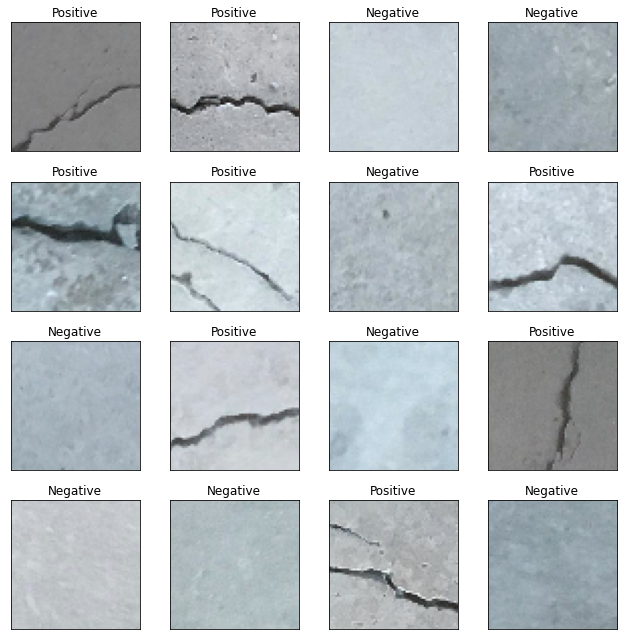

In [25]:
import matplotlib.pyplot as plt

class_names = { 0 : 'Negative', 1 : 'Positive'}

plt.figure(figsize=(9,9))

pos = 0

for i in random_index_list:
    plt.subplot(4,4,pos+1)
    plt.title(str(class_names[y_train[i]]))
    plt.xticks([]); plt.yticks([])

    plt.imshow(x_train[i])

    pos += 1

plt.tight_layout()
plt.show()

# Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,GlobalAveragePooling2D 
from tensorflow.keras.optimizers import Adam

In [39]:
class_nums = len(os.listdir(TRAIN_DATA_ROOT_DIR))

cnn = Sequential()

cnn.add(Conv2D(input_shape=(IMG_WIDTH, IMG_HEIGHT,3),filters = 64,kernel_size=(3,3), padding='same',activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters = 64,kernel_size=(3,3), padding='same',activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters = 32,kernel_size=(3,3), padding='same',activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(GlobalAveragePooling2D())

cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.25))

cnn.add(Dense(class_nums,activation='softmax'))

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 64)       

In [40]:
cnn.compile(optimizer=Adam(learning_rate=1e-5),
            loss='sparse_categorical_crossentropy',
            metrics=['acc'])

In [41]:
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime

earlystopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)


start_time = datetime.now()

hist = cnn.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test)) # callbacks=[earlystopping]

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/30
1000/1000 [==============================] - 22s 21ms/step - loss: 0.6816 - acc: 0.6022 - val_loss: 0.6631 - val_acc: 0.6725
Epoch 2/30
1000/1000 [==============================] - 21s 21ms/step - loss: 0.5002 - acc: 0.8413 - val_loss: 0.4279 - val_acc: 0.8206
Epoch 3/30
1000/1000 [==============================] - 21s 21ms/step - loss: 0.2593 - acc: 0.9282 - val_loss: 0.2628 - val_acc: 0.8984
Epoch 4/30
1000/1000 [==============================] - 20s 20ms/step - loss: 0.1496 - acc: 0.9566 - val_loss: 0.1803 - val_acc: 0.9316
Epoch 5/30
1000/1000 [==============================] - 21s 21ms/step - loss: 0.1086 - acc: 0.9662 - val_loss: 0.1334 - val_acc: 0.9501
Epoch 6/30
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0894 - acc: 0.9717 - val_loss: 0.1325 - val_acc: 0.9490
Epoch 7/30
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0792 - acc: 0.9742 - val_loss: 0.1216 - val_acc: 0.9548
Epoch 8/30
1000/1000 [==========================

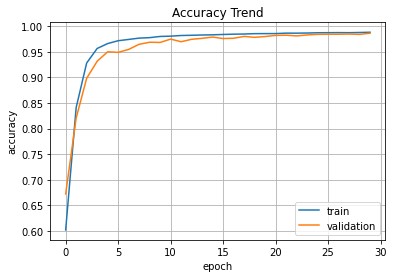

In [42]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

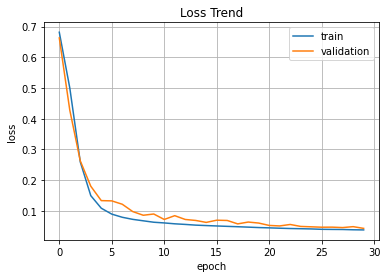

In [43]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [44]:
cnn.evaluate(x_test, y_test)

250/250 [==============================] - 2s 8ms/step - loss: 0.0430 - acc: 0.9864


[0.04301505535840988, 0.9863749742507935]